In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Carregar o dataset
file_path = '..\\..\\Dataset\\testes\\dataset_casos_mensais_publicacao.csv'
dengue_data = pd.read_csv(file_path)

# Preparação dos dados: filtrando o município de São Paulo (código: 355030)
municipio_sp_code = 355030

In [12]:
dengue_data

,dt_notificacao,ano_notificacao,mes_notificacao,cd_municipio,qntd_casos,qntd_hospitalizacao,qntd_resultado_soro,qntd_resultado_ns1,qntd_resultado_pcr,qntd_auctone,qntd_febre,qntd_vomito,qntd_nausea,qntd_sangramento,precipitacao_total_mensal,temp_media_mensal,vento_vlc_media_mensal
0,2013-12-01,2013,12,350010,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2013-12-01,2013,12,350020,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2013-12-01,2013,12,350030,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3,2013-12-01,2013,12,350040,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2013-12-01,2013,12,350050,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83845,2024-09-01,2024,9,355700,3,0,1,2,0,0,2,0,1,0,NaN,NaN,NaN
83846,2024-09-01,2024,9,355710,144,6,1,1,0,1,108,32,48,0,NaN,NaN,NaN
83847,2024-09-01,2024,9,355715,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
83848,2024-09-01,2024,9,355720,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [13]:
dengue_data = dengue_data[dengue_data['cd_municipio'] == municipio_sp_code]

In [14]:
dengue_data

,dt_notificacao,ano_notificacao,mes_notificacao,cd_municipio,qntd_casos,qntd_hospitalizacao,qntd_resultado_soro,qntd_resultado_ns1,qntd_resultado_pcr,qntd_auctone,qntd_febre,qntd_vomito,qntd_nausea,qntd_sangramento,precipitacao_total_mensal,temp_media_mensal,vento_vlc_media_mensal
562,2013-12-01,2013,12,355030,37,1,2,0,0,2,0,0,0,0,NaN,NaN,NaN
1207,2014-01-01,2014,1,355030,821,81,127,26,0,94,0,0,0,1,NaN,NaN,NaN
1852,2014-02-01,2014,2,355030,1770,124,486,128,2,549,0,0,0,0,NaN,NaN,NaN
2497,2014-03-01,2014,3,355030,6402,373,2611,877,7,3461,0,0,0,0,NaN,NaN,NaN
3142,2014-04-01,2014,4,355030,26093,907,9288,3645,16,13426,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81187,2024-05-01,2024,5,355030,199128,4501,37257,130644,232,145181,173691,54959,96832,0,0.07,20.48,1.80
81832,2024-06-01,2024,6,355030,58226,1653,14687,36604,94,40371,47677,15954,27391,0,0.01,18.92,1.55
82477,2024-07-01,2024,7,355030,15878,527,3644,9668,14,10647,12703,4245,6944,0,NaN,NaN,NaN
83122,2024-08-01,2024,8,355030,6599,205,1279,4295,19,3914,5023,1563,2597,0,NaN,NaN,NaN


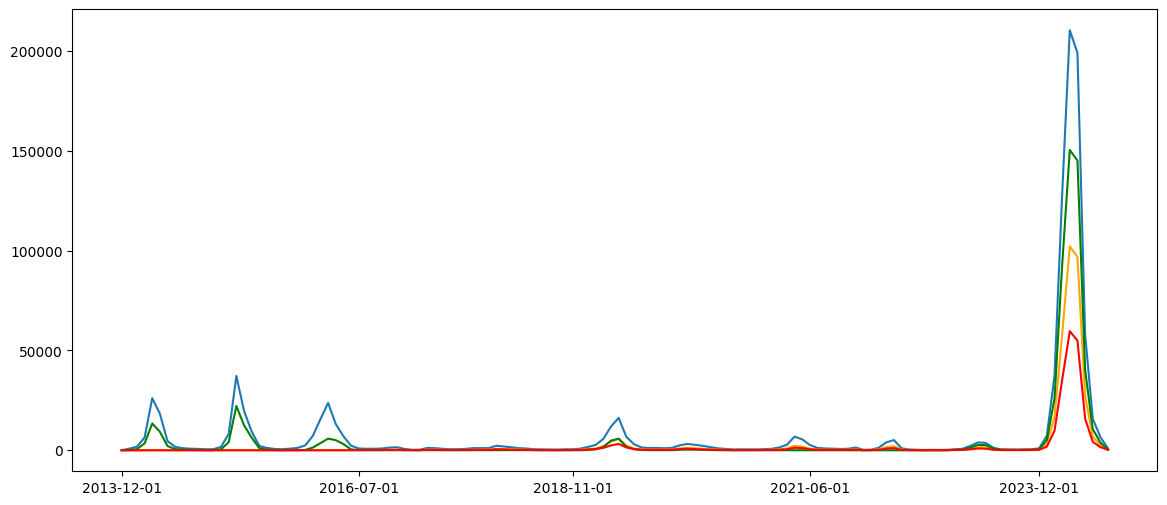

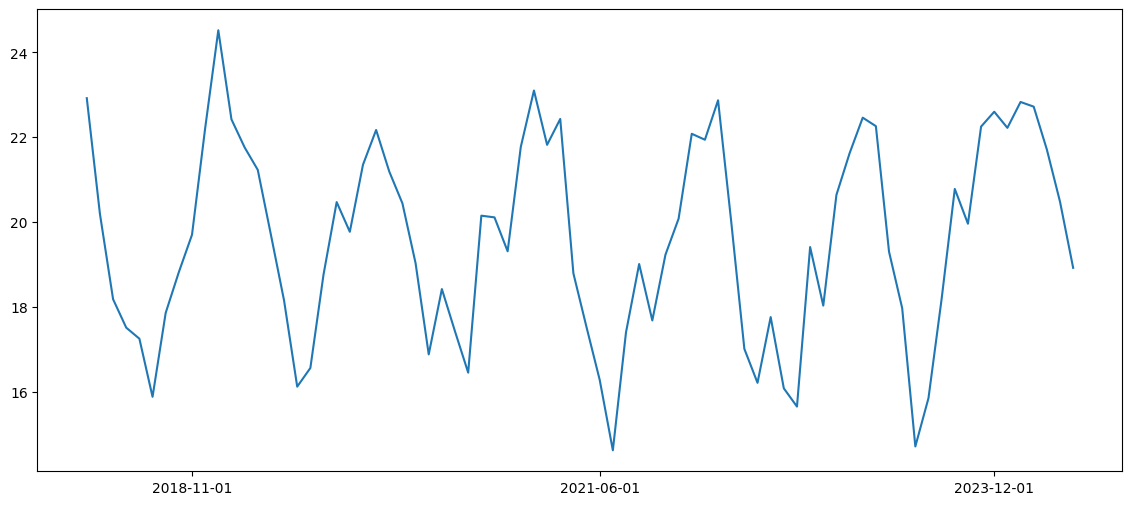

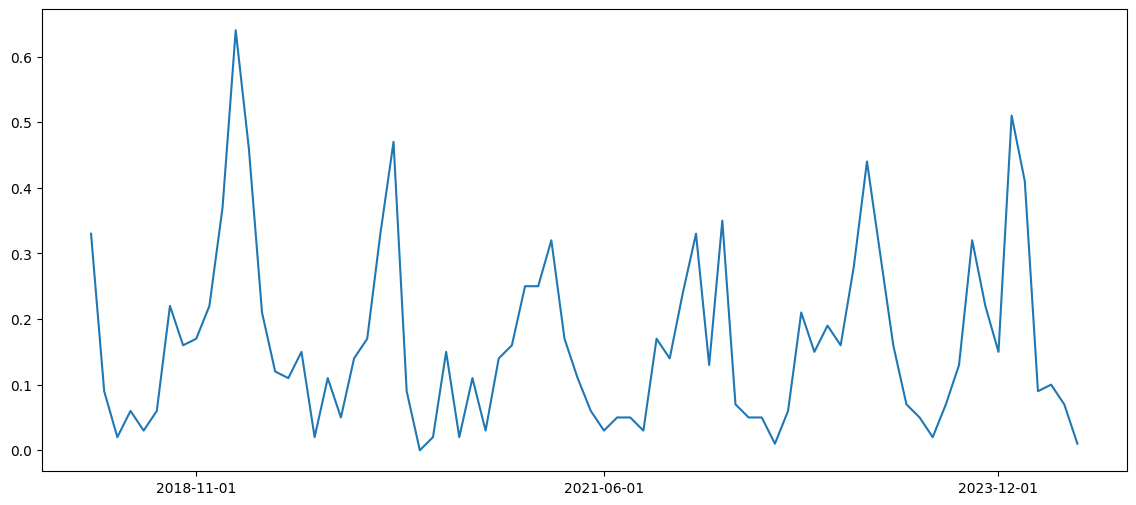

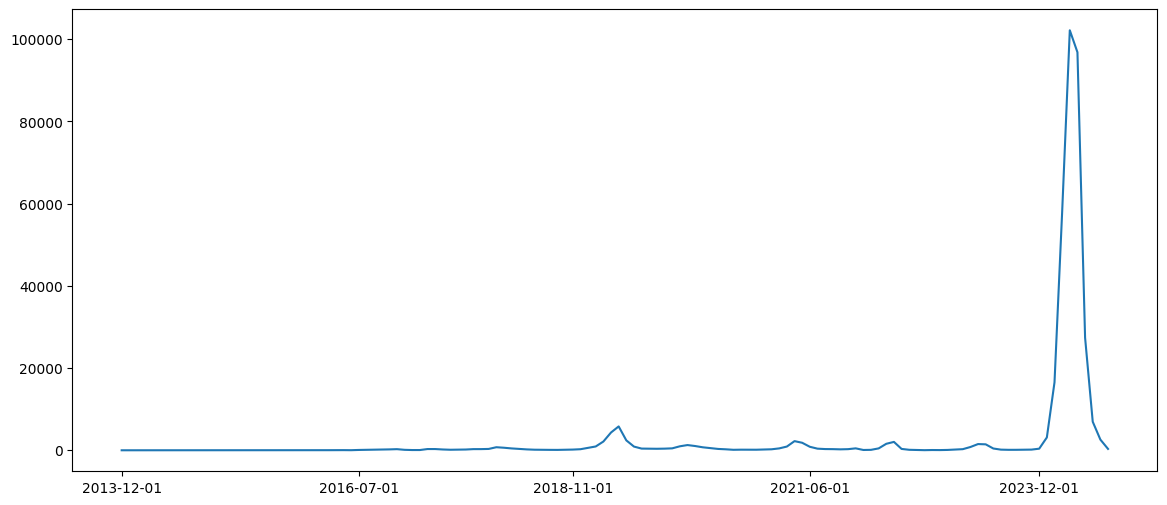

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(dengue_data['dt_notificacao'], dengue_data['qntd_casos'], label='casos')
plt.plot(dengue_data['dt_notificacao'], dengue_data['qntd_nausea'], label='temperatura', color='orange')
plt.plot(dengue_data['dt_notificacao'], dengue_data['qntd_auctone'], label='auctone', color='green')
plt.plot(dengue_data['dt_notificacao'], dengue_data['qntd_vomito'], label='vomito', color='red')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(dengue_data['dt_notificacao'], dengue_data['temp_media_mensal'], label='temperatura')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(dengue_data['dt_notificacao'], dengue_data['precipitacao_total_mensal'], label='temperatura')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(dengue_data['dt_notificacao'], dengue_data['qntd_nausea'], label='temperatura')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
plt.show()